# California Housing

## Problem Statement
**House grouping system** 

We want to be able to classify houses according to their region and median income. To do this, we will use the famous California Housing dataset. It was constructed using data from the 1990 California census. It contains one row per census block group. A block group is the smallest geographic unit for which US Census data is published.

In [1]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from pickle import dump

In [2]:
raw_df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
raw_df.to_csv("../data/raw/housing_raw.csv")
raw_df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
processed_df = raw_df[["MedInc", "Latitude", "Longitude"]].copy()
processed_df.head(5)

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [4]:
X_train, X_test = train_test_split(processed_df, test_size = 0.2, random_state = 2020)
X_train.head()

,MedInc,Latitude,Longitude
14422,2.4643,32.80,-117.23
13631,2.5238,34.07,-117.33
18479,5.6205,37.13,-121.67
5162,1.6029,33.95,-118.29
3653,4.2656,34.22,-118.43


In [5]:
model_km = KMeans(n_clusters = 6, random_state = 1010)
model_km.fit(X_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=1010)

In [6]:
y_train = list(model_km.labels_)
X_train["cluster"] = y_train
X_train.head(15)

,MedInc,Latitude,Longitude,cluster
14422,2.4643,32.80,-117.23,0
13631,2.5238,34.07,-117.33,0
18479,5.6205,37.13,-121.67,3
5162,1.6029,33.95,-118.29,0
3653,4.2656,34.22,-118.43,4
6235,4.6118,34.07,-117.96,4
8561,4.1818,33.93,-118.41,4
6184,5.0123,34.09,-117.92,4
1788,1.6000,37.94,-122.36,1
17035,3.7045,37.50,-122.26,1


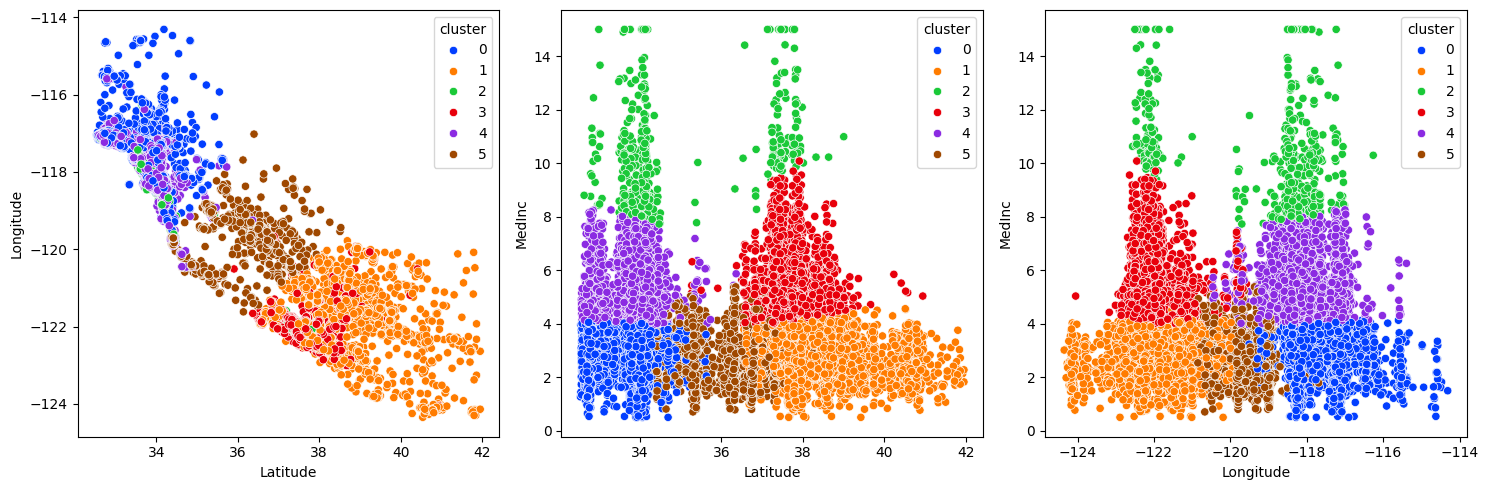

In [7]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "bright")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "bright")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "bright")
plt.tight_layout()

plt.show()

In [8]:
y_test = list(model_km.predict(X_test))
X_test["cluster"] = y_test
X_test.head(5)

,MedInc,Latitude,Longitude,cluster
6847,4.1902,34.07,-118.14,4
17018,6.8787,37.52,-122.29,3
15399,5.5430,33.20,-117.20,4
18714,4.1099,40.57,-122.42,1
1742,2.5164,37.96,-122.35,1


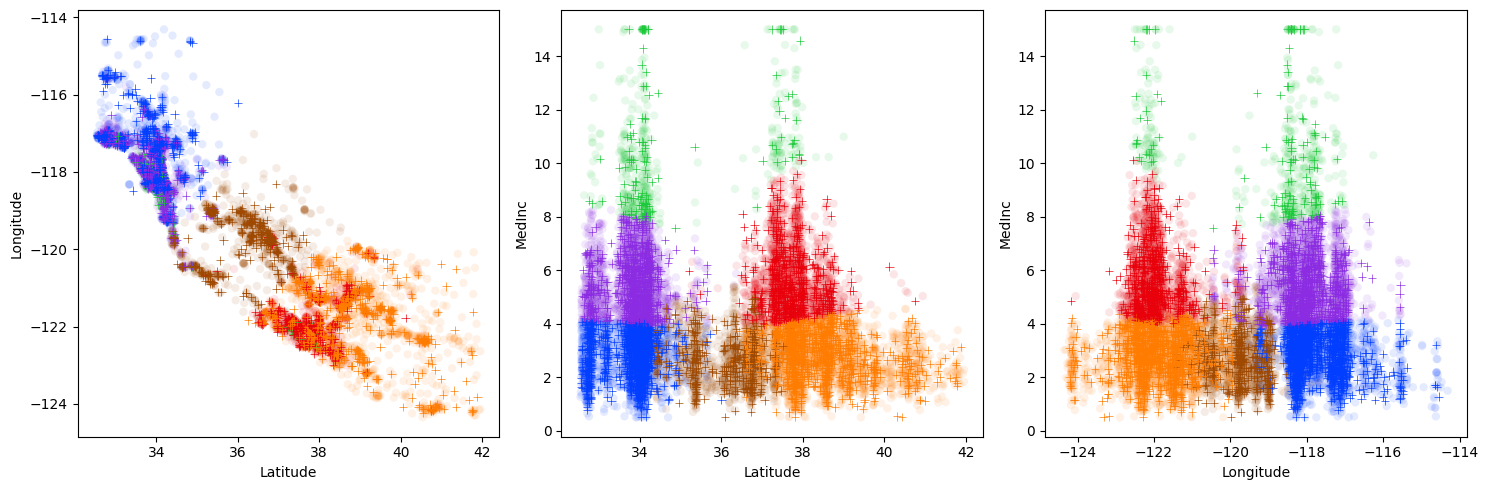

In [9]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "bright", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "bright", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "bright", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "bright", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "bright", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "bright", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

In [10]:
# Random Forest Classifier

model_rfc = DecisionTreeClassifier(random_state = 1010)
model_rfc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1010)

In [11]:
y_pred = model_rfc.predict(X_test)
y_pred

array([4, 3, 4, ..., 1, 0, 1], dtype=int32)

In [12]:
accuracy_score(y_test, y_pred)

1.0

In [14]:
dump(model_km, open("../models/k-means_default_1010.sav", "wb"))
dump(model_rfc, open("../models/ranfor_classifier_nestimators-100_1010.sav", "wb"))

In [ ]:
# El modelo es perfecto